# 73% ACCURACY CNN WHOLE FLOW FOR EASY RUN
*same with layers with 83% only with GlobalAveragePooling2D instead of flatten*

In [1]:
!pip install ultralytics opencv-python matplotlib roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 37.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.

In [ ]:
# Add this cell at the beginning of your notebook or after TensorFlow import
import tensorflow as tf

gpu_available = tf.config.list_physical_devices('GPU')
if gpu_available:
    print(f"Num GPUs Available: {len(gpu_available)}")
    print(f"GPU Device Name: {gpu_available[0].name}")
else:
    print("No GPU device found. Running on CPU.")
    # If you intended to use a GPU, stop and change runtime type.

# Proceed with the rest of your imports and code

No GPU device found. Running on CPU.


In [ ]:
import os
import numpy as np
import tensorflow as tf
import cv2
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score, accuracy_score

from datetime import datetime


In [ ]:
# Set mixed precision
tf.keras.mixed_precision.set_global_policy('mixed_float16')

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="kllPn6XsBsLz8K2iQx6i")
project = rf.workspace("deep-learning-rp9gw").project("final-proj-jpjtg")
version = project.version(3)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to final-proj-3 in yolov8:: 100%|██████████| 25292/25292 [00:05<00:00, 4699.81it/s] 


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 100, 100,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ cast (Cast)         │ (None, 100, 100,  │          0 │ input_layer[0][0] │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 100, 100,  │        896 │ cast[0][0]        │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 50, 50,    │          0 │ conv2d[0][0]      │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 50, 50,    │     18,496 │ max_pooling2d[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 25, 25,    │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 64)        │          0 │ max_pooling2d_1[… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 256)       │     16,640 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ class_output        │ (None, 5)         │      1,285 │ dense[0][0]       │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bbox_output (Dense) │ (None, 4)         │      1,028 │ dense[0][0]       │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 38,345 (149.79 KB)

 Trainable params: 38,345 (149.79 KB)

 Non-trainable params: 0 (0.00 B)

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.


Epoch 1/10
287/287 ━━━━━━━━━━━━━━━━━━━━ 3289s 11s/step - bbox_output_loss: 0.0337 - class_output_accuracy: 0.3204 - class_output_loss: 1.5095 - loss: 1.5432 - val_bbox_output_loss: 0.0272 - val_class_output_accuracy: 0.5554 - val_class_output_loss: 1.1099 - val_loss: 1.1365
Epoch 2/10
287/287 ━━━━━━━━━━━━━━━━━━━━ 3267s 11s/step - bbox_output_loss: 0.0249 - class_output_accuracy: 0.5840 - class_output_loss: 1.0767 - loss: 1.1016 - val_bbox_output_loss: 0.0242 - val_class_output_accuracy: 0.5789 - val_class_output_loss: 1.0788 - val_loss: 1.1035
Epoch 3/10
287/287 ━━━━━━━━━━━━━━━━━━━━ 3260s 11s/step - bbox_output_loss: 0.0230 - class_output_accuracy: 0.6244 - class_output_loss: 0.9471 - loss: 0.9701 - val_bbox_output_loss: 0.0221 - val_class_output_accuracy: 0.6347 - val_class_output_loss: 0.8869 - val_loss: 0.9078
Epoch 4/10
287/287 ━━━━━━━━━━━━━━━━━━━━ 3265s 11s/step - bbox_output_loss: 0.0213 - class_output_accuracy: 0.6576 - class_output_loss: 0.8568 - loss: 0.8781 - val_bbox_output_

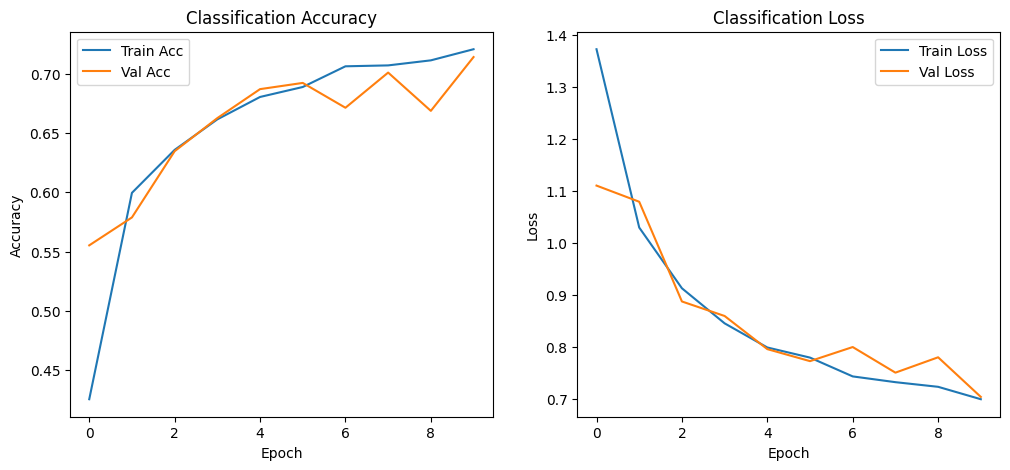

36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 163ms/step
Classification Report:
               precision    recall  f1-score   support

       glass       0.59      0.23      0.33       143
        leaf       0.96      0.97      0.97       271
       metal       0.73      0.69      0.71       226
       paper       0.61      0.88      0.72       239
     plastic       0.70      0.67      0.69       266

    accuracy                           0.74      1145
   macro avg       0.72      0.69      0.68      1145
weighted avg       0.74      0.74      0.72      1145

Accuracy: 0.7354
F1 Score (weighted): 0.7201
Using last conv layer: conv2d_1


The structure of `inputs` doesn't match the expected structure.
Expected: [['keras_tensor']]
Received: inputs=Tensor(shape=(1, 100, 100, 3))


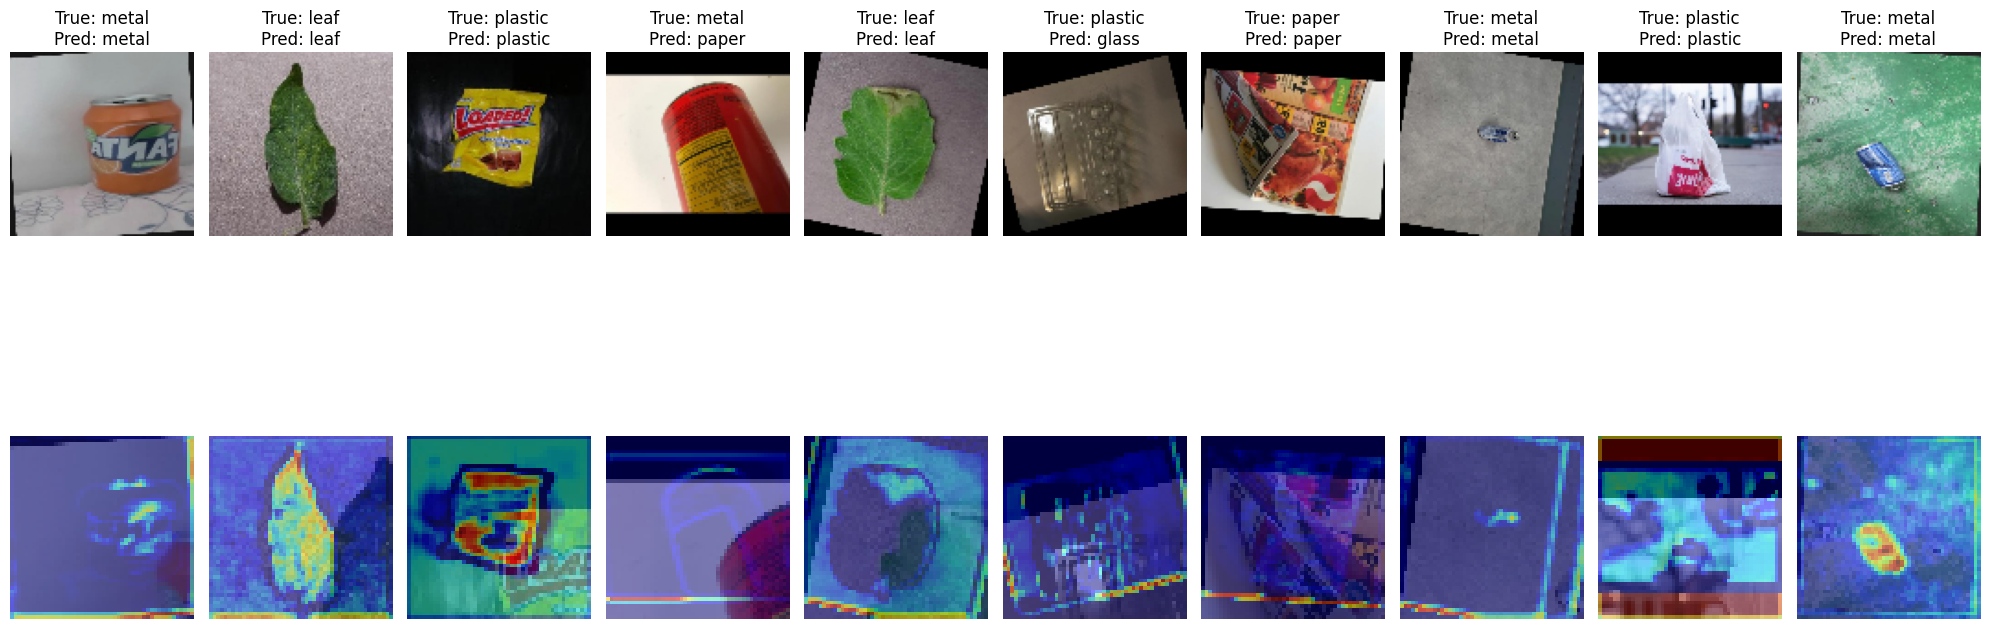


Random 10 Predictions with True Labels & Categories:
Image 330: Predicted = metal (('non-biodegradable', 'recyclable')), True = metal (('non-biodegradable', 'recyclable'))
Image 509: Predicted = leaf (('biodegradable', 'non-recyclable')), True = leaf (('biodegradable', 'non-recyclable'))
Image 1017: Predicted = plastic (('non-biodegradable', 'recyclable')), True = plastic (('non-biodegradable', 'recyclable'))
Image 281: Predicted = paper (('biodegradable', 'recyclable')), True = metal (('non-biodegradable', 'recyclable'))
Image 758: Predicted = leaf (('biodegradable', 'non-recyclable')), True = leaf (('biodegradable', 'non-recyclable'))
Image 1134: Predicted = glass (('non-biodegradable', 'recyclable')), True = plastic (('non-biodegradable', 'recyclable'))
Image 113: Predicted = paper (('biodegradable', 'recyclable')), True = paper (('biodegradable', 'recyclable'))
Image 424: Predicted = metal (('non-biodegradable', 'recyclable')), True = metal (('non-biodegradable', 'recyclable'))
Im

In [ ]:
import os
import random
import numpy as np
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, f1_score, accuracy_score
from tensorflow.keras.utils import Sequence
from tensorflow.keras import layers, models, optimizers
import datetime

# === Configuration ===
image_size = (100, 100)  # Keep this to avoid RAM crash
batch_size = 32
epochs = 10

# Set paths
image_dir = "/content/final-proj-3/train/images"
label_dir = "/content/final-proj-3/train/labels"

class_names = ['glass', 'leaf', 'metal', 'paper', 'plastic']
num_classes = len(class_names)

waste_category = {
    "glass": ("non-biodegradable", "recyclable"),
    "leaf": ("biodegradable", "non-recyclable"),
    "metal": ("non-biodegradable", "recyclable"),
    "paper": ("biodegradable", "recyclable"),
    "plastic": ("non-biodegradable", "recyclable"),
}

# === Data Augmentation Function ===
def augment_image(image):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_brightness(image, max_delta=0.1)
    image = tf.image.random_contrast(image, lower=0.9, upper=1.1)
    image = tf.image.random_saturation(image, lower=0.9, upper=1.1)
    return image

# === Data Generator ===
class WasteDataGenerator(Sequence):
    def __init__(self, image_filenames, batch_size, image_size, augment=False, shuffle=True):
        self.image_filenames = image_filenames
        self.batch_size = batch_size
        self.image_size = image_size
        self.augment = augment
        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
        return int(np.ceil(len(self.image_filenames) / self.batch_size))

    def on_epoch_end(self):
        if self.shuffle:
            random.shuffle(self.image_filenames)

    def __getitem__(self, index):
        batch_files = self.image_filenames[index * self.batch_size:(index + 1) * self.batch_size]
        X = []
        y_class = []
        y_bbox = []

        for fname in batch_files:
            img_path = os.path.join(image_dir, fname)
            label_path = os.path.join(label_dir, os.path.splitext(fname)[0] + ".txt")

            if not os.path.exists(img_path) or not os.path.exists(label_path):
                continue

            img = cv2.imread(img_path)
            if img is None:
                continue
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, self.image_size)
            img = img / 255.0

            if self.augment:
                img = augment_image(tf.convert_to_tensor(img))
                img = tf.clip_by_value(img, 0.0, 1.0).numpy()  # Clip after augmentation

            with open(label_path, 'r') as f:
                line = f.readline().strip().split()
                if len(line) != 5:
                    continue
                cls_id = int(line[0])
                bbox = list(map(float, line[1:]))

            X.append(img)
            y_class.append(tf.keras.utils.to_categorical(cls_id, num_classes=num_classes))
            y_bbox.append(bbox)

        return np.array(X), {"class_output": np.array(y_class), "bbox_output": np.array(y_bbox)}

# === Load filenames ===
all_filenames = [f for f in os.listdir(image_dir) if f.endswith(('.jpg', '.png'))]
random.shuffle(all_filenames)

split1 = int(len(all_filenames)*0.8)
split2 = int(len(all_filenames)*0.9)

train_files = all_filenames[:split1]
val_files = all_filenames[split1:split2]
test_files = all_filenames[split2:]

train_gen = WasteDataGenerator(train_files, batch_size, image_size, augment=True, shuffle=True)
val_gen = WasteDataGenerator(val_files, batch_size, image_size, augment=False, shuffle=False)
test_gen = WasteDataGenerator(test_files, batch_size, image_size, augment=False, shuffle=False)

# === YOLO-like model from scratch ===
def build_yolo_model():
    inputs = layers.Input(shape=(image_size[0], image_size[1], 3))

    x = layers.Conv2D(32, (3,3), activation='relu', padding='same')(inputs)
    x = layers.MaxPooling2D()(x)
    x = layers.Conv2D(64, (3,3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D()(x)

    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(256, activation='relu')(x)

    class_output = layers.Dense(num_classes, activation='softmax', name='class_output')(x)
    bbox_output = layers.Dense(4, activation='sigmoid', name='bbox_output')(x)

    model = models.Model(inputs=inputs, outputs=[class_output, bbox_output])
    model.compile(
        optimizer=optimizers.Adam(learning_rate=0.001),
        loss={'class_output': 'categorical_crossentropy', 'bbox_output': 'mse'},
        metrics={'class_output': 'accuracy'}
    )
    return model

model = build_yolo_model()
model.summary()

# === Callbacks ===
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint("best_yolo_model.keras", save_best_only=True, monitor="val_class_output_accuracy", mode="max")
earlystop_callback = tf.keras.callbacks.EarlyStopping(monitor="val_class_output_accuracy", patience=5, restore_best_weights=True, mode="max")

# === Train ===
history = model.fit(
    train_gen,
    epochs=epochs,
    validation_data=val_gen,
    callbacks=[tensorboard_callback, checkpoint_callback, earlystop_callback],
    verbose=1
)

# === Plot training history ===
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['class_output_accuracy'], label='Train Acc')
plt.plot(history.history['val_class_output_accuracy'], label='Val Acc')
plt.title('Classification Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['class_output_loss'], label='Train Loss')
plt.plot(history.history['val_class_output_loss'], label='Val Loss')
plt.title('Classification Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# === Evaluate on test set ===
X_test = []
y_class_true = []
y_bbox_true = []

for i in range(len(test_gen)):
    X_batch, y_batch = test_gen[i]
    X_test.append(X_batch)
    y_class_true.append(y_batch['class_output'])
    y_bbox_true.append(y_batch['bbox_output'])

X_test = np.vstack(X_test)
y_class_true = np.vstack(y_class_true)
y_bbox_true = np.vstack(y_bbox_true)

pred_class_probs, pred_bbox = model.predict(X_test)
y_true = np.argmax(y_class_true, axis=1)
y_pred = np.argmax(pred_class_probs, axis=1)

print("Classification Report:\n", classification_report(y_true, y_pred, target_names=class_names))
print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
print(f"F1 Score (weighted): {f1_score(y_true, y_pred, average='weighted'):.4f}")

# === Grad-CAM heatmap function ===
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output[0]]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(predictions[0])
        class_channel = predictions[:, pred_index]

    grads = tape.gradient(class_channel, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

# === Show heatmaps for 10 random test images ===
last_conv_layer_name = None
for layer in reversed(model.layers):
    if isinstance(layer, layers.Conv2D):
        last_conv_layer_name = layer.name
        break

print(f"Using last conv layer: {last_conv_layer_name}")

plt.figure(figsize=(20,10))
random_indices = random.sample(range(len(X_test)), 10)
for i, idx in enumerate(random_indices):
    img = X_test[idx]
    img_input = np.expand_dims(img, axis=0)
    heatmap = make_gradcam_heatmap(img_input, model, last_conv_layer_name, pred_index=y_pred[idx])

    plt.subplot(2, 10, i + 1)
    plt.imshow(img)
    plt.title(f"True: {class_names[y_true[idx]]}\nPred: {class_names[y_pred[idx]]}")
    plt.axis('off')

    plt.subplot(2, 10, i + 11)
    plt.imshow(img)
    plt.imshow(heatmap, cmap='jet', alpha=0.5)
    plt.axis('off')

plt.tight_layout()
plt.show()

# === Show random 10 image predictions with category info ===
print("\nRandom 10 Predictions with True Labels & Categories:")
for idx in random_indices:
    pred_cls = class_names[y_pred[idx]]
    true_cls = class_names[y_true[idx]]
    pred_cat = waste_category[pred_cls]
    true_cat = waste_category[true_cls]
    print(f"Image {idx}: Predicted = {pred_cls} ({pred_cat}), True = {true_cls} ({true_cat})")


In [ ]:
model.save('model.keras')

In [ ]:
import tensorflow as tf
model.save('model.h5')
